In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import tdt
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
from probeinterface.plotting import plot_probe

from instruments.helpers.extract_helpers import load_bhv_file

from spikesorting_scripts.npyx_metadata_fct import get_npix_sync

tdt_fs=24414.062500


/home/jules/anaconda3/envs/ibl_pykil_ss/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
npx_data = Path('/mnt/a/NeuropixelData/raw') #/F2003_Orecchiette/090523_ore_am_g0')
bhv_path = Path('/home/jules/Dropbox/Data') # /F2003_Orecchiette')
# bhv_file = bhv_path / 'F2003_Orecchiette' / '9_5_2023 level48_Ore15SSN.txt 11_43.mat'

# dp = npx_data / 'F2003_Orecchiette' / '090523_ore_am_g0'

# dp = npx_data / 'F1903_Trifle_1' / '251022_Trifle_AM_g0'

# dp = npx_data / 'F1903_Trifle_1' / '311022_Trifle_AM_g0'

# dp = npx_data / 'F2003_Orecchiette' / '16112022_Orec_g0'

dp = npx_data / 'F2003_Orecchiette' / '15112022_Ore_AM_g0'

# dp = npx_data / 'F1903_Trifle_1' / '271022_Trifle_AM_g0'


# bhv_file = bhv_path / 'F1903_Trifle' / '25_10_2022 level41_Trifle15SSN.txt 13_6.mat'
# bhv_file = bhv_path / 'F1903_Trifle' / '31_10_2022 level41_TrifleNoNoiseprobes.txt 12_33.mat'
# bhv_file = bhv_path / 'F1903_Trifle' / '27_10_2022 level41_Trifle15SSN.txt 12_9.mat'
bhv_file = bhv_path / 'F2003_Orecchiette' / '15_11_2022 level41_Orecchiette_passive.txt 11_53.mat'

rec = se.read_spikeglx(dp, stream_id='imec0.ap')
recording_lfp = spre.bandpass_filter(rec, freq_min=1, freq_max=45)
recording_lfp = spre.resample(recording_lfp, 1000)

# pulse_time, _ = get_npix_sync(dp, output_binary=False, unit='seconds', sync_trial_chan=[5], verbose=True)
# pulse_time = pulse_time[5]

# # load behavior
# df_bhv = load_bhv_file(str(bhv_file))

# imec_pulse_time = pulse_time[:len(df_bhv.npPulseTime)]
# assert np.allclose(np.diff(df_bhv.npPulseTime), np.diff(imec_pulse_time), atol=0.01), \
#     f'Behavioural file and sync pulses data do not match (probably because of a missing pulse somewhere)'
# df_bhv['imec_pulse_time'] = imec_pulse_time
# df_bhv['lick_imec_time'] = df_bhv.startTrialLick - df_bhv.npPulseTime + df_bhv.imec_pulse_time


In [9]:
df_bhv.holdSamples

0      20346
1      12208
2      16277
3      12208
4      24415
       ...  
104    24415
105    12208
106    24415
107    20346
108    20346
Name: holdSamples, Length: 109, dtype: int64

In [5]:
blockpath = Path('/mnt/b/WarpData/behaving/raw') #/F2003_Orecchiette')
# tdt_block = tdt.read_block(blockpath / 'F1903_Trifle' / 'BlockNellie-AA-94') # 'BlockNellie-AB-4')
tdt_block = tdt.read_block(blockpath / 'F2003_Orecchiette' / 'BlockNellie-AA-1')

trig = tdt_block.streams.trig.data
trig_fs = tdt_block.streams.trig.fs
trig.shape

read from t=0s to t=1478.76s
Using 24414.0625 Hz as SEV sampling rate for BB_2
Using 24414.0625 Hz as SEV sampling rate for BB_3
Using 24414.0625 Hz as SEV sampling rate for BB_4
Using 24414.0625 Hz as SEV sampling rate for BB_5
Using 24414.0625 Hz as SEV sampling rate for recI


(3, 36102144)

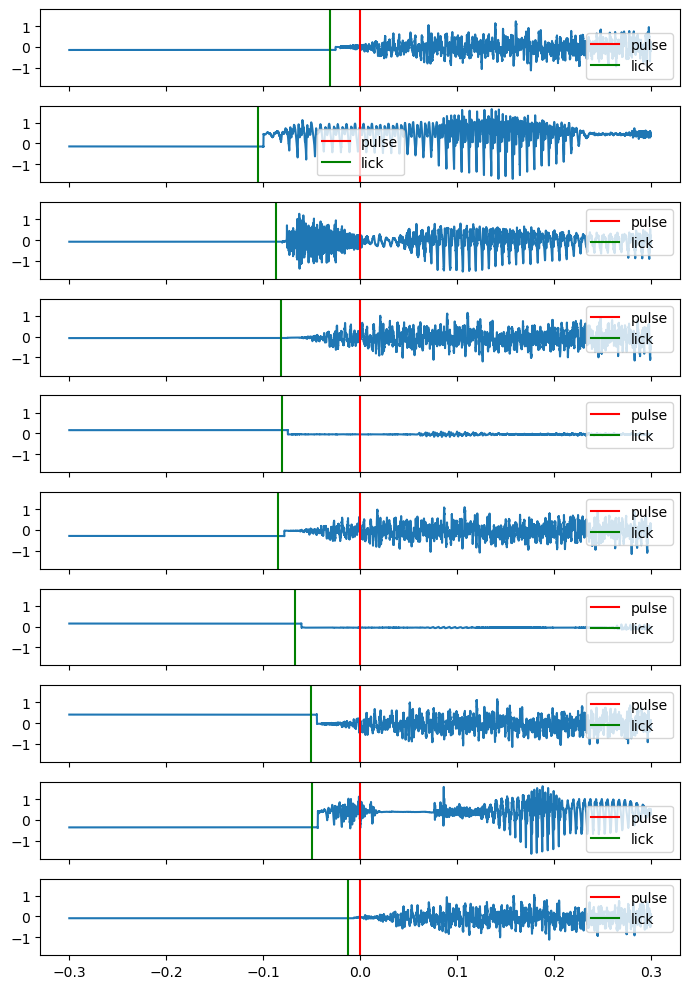

In [6]:
n=10
df_bhv_subset = df_bhv.sample(n=n, random_state=1)

fig, axes = plt.subplots(n, 1, figsize=(7, 10), sharex=True, sharey=True)

window = np.array([-.3, .3])
window_samples = (window * trig_fs).astype(int)

for ax, pulse, start_lick in zip(axes, df_bhv_subset.npPulseTime, df_bhv_subset.startTrialLick):
    pulses_samples = (pulse * trig_fs).astype(int)
    lick_samples = (start_lick * trig_fs).astype(int)
    times = np.arange(window_samples[0], window_samples[1]) / trig_fs
    ax.plot(times, trig[1, pulses_samples + window_samples[0]: pulses_samples + window_samples[1]])
    ax.axvline(0, color='r', label='pulse')
    ax.axvline((lick_samples - pulses_samples) / trig_fs, color='g', label='lick')
    ax.legend()

fig.tight_layout()

In [47]:
imec_pulse_time = pulse_time[:len(df_bhv.npPulseTime)]
assert np.allclose(np.diff(df_bhv.npPulseTime), np.diff(imec_pulse_time), atol=0.01), \
    f'Behavioural file and sync pulses data do not match (probably because of a missing pulse somewhere)'
df_bhv['imec_pulse_time'] = imec_pulse_time
df_bhv['lick_imec_time'] = df_bhv.startTrialLick - df_bhv.npPulseTime + df_bhv.imec_pulse_time

(<matplotlib.collections.PolyCollection at 0x7f824df7bf40>,
 <matplotlib.collections.PolyCollection at 0x7f824de8afa0>)

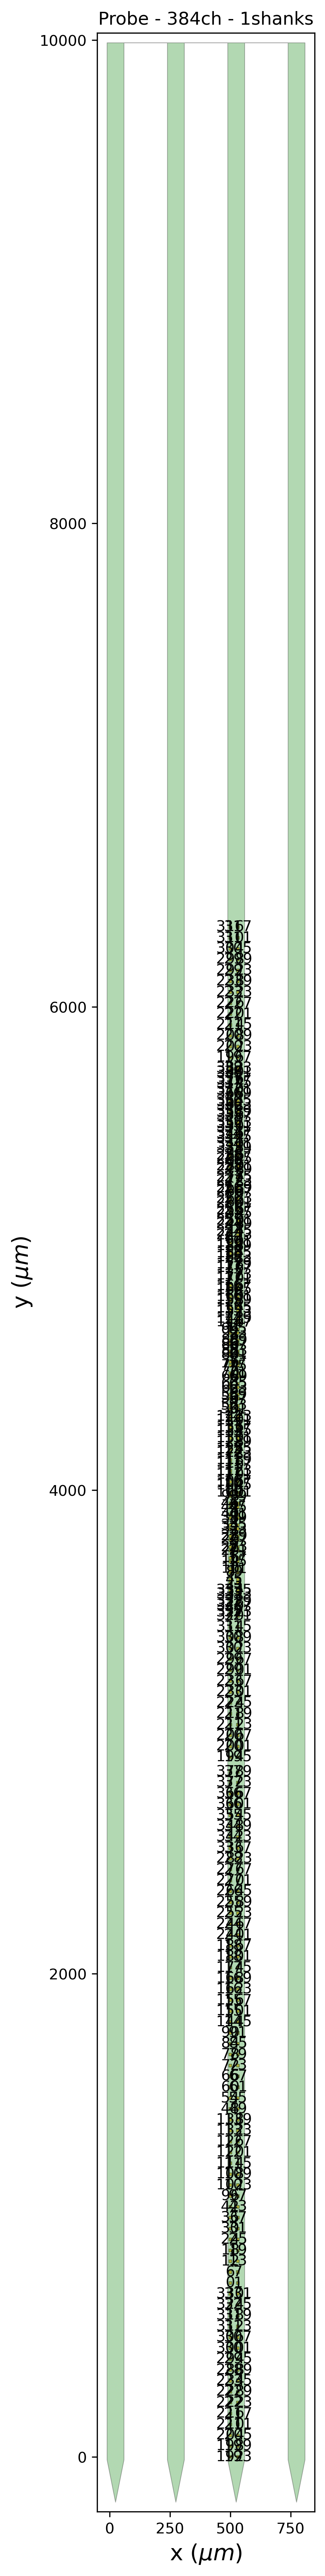

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 30), dpi=300)

probe = recording_lfp.get_probe()
plot_probe(probe,with_channel_index=True, ax=ax)

# plt.savefig(Path('/home/jules/Documents') / 'probe.png', dpi = 300, bbox_inches='tight')


In [4]:
lfp_fs = recording_lfp.get_sampling_frequency()
window = np.array([-.5, .5])
window_samples = (window * lfp_fs).astype(int)
pulses_samples = (pulse_time * lfp_fs).astype(int)

            ces = np.arange(0,385,20)
            = recording_lfp.channel_ids[channel_indices]

traces = np.zeros((len(pulses_samples), np.diff(window_samples)[0], len(channel_ids)))

for i, pulse in tqdm(enumerate(pulses_samples), total=len(pulses_samples)):
#     rel_lick_time = (lick_samples - pulses_samples) / trig_fs
    pulse_traces = recording_lfp.get_traces(
            start_frame=pulse+window_samples[0],
            end_frame=pulse+window_samples[1],
            channel_ids=channel_ids
    )
    traces[i,:,:] = pulse_traces[:traces.shape[1],:]

100%|██████████| 222/222 [01:00<00:00,  3.70it/s]


Text(0.5, 0, 'Time from trial onset (s)')

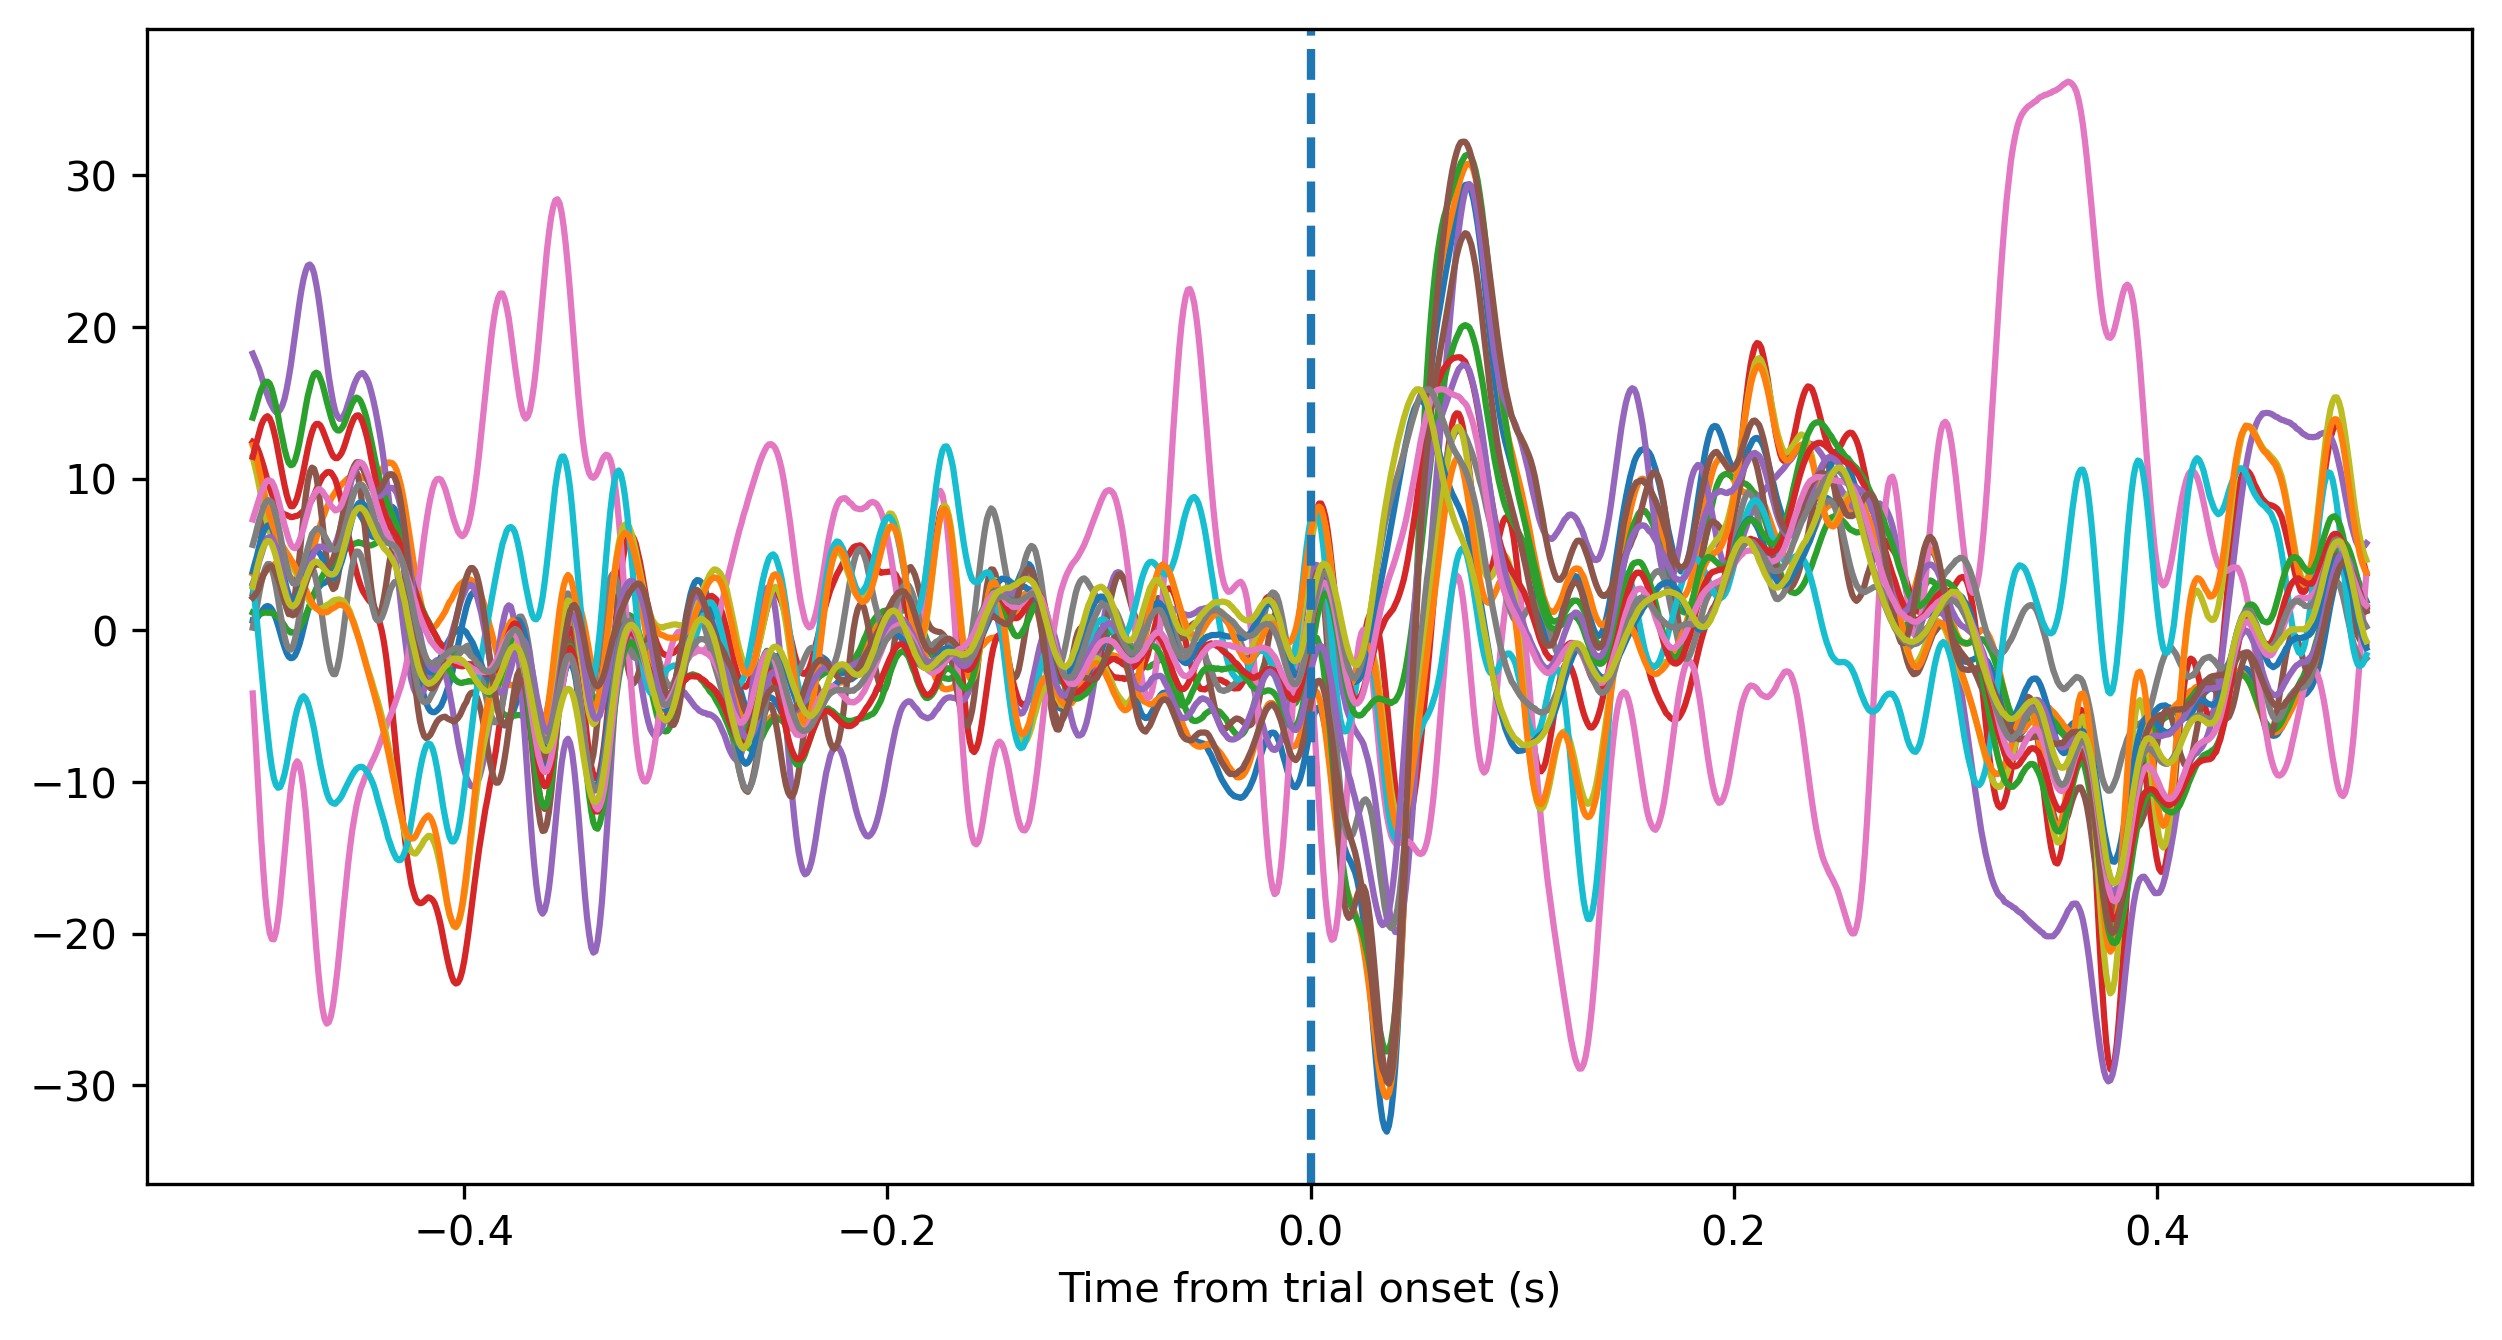

In [5]:
fig, ax = plt.subplots(figsize = (10,5), dpi=300)
times = np.arange(window[0], window[1], 1/lfp_fs)
for chan in range(traces.shape[2]):
    to_plot = np.mean(np.squeeze(traces[:,:,chan]), axis=0)
    if not np.max(to_plot) > 50:
        ax.plot(
            times,
            to_plot,
            label=channel_ids[chan],
            )
    
ax.axvline(0, linestyle='--', linewidth=2)
# ax.legend()
ax.set_xlabel('Time from trial onset (s)')

In [3]:
lfp_fs = recording_lfp.get_sampling_frequency()
window = np.array([-2, 2])
window_samples = (window * lfp_fs).astype(int)
pulses_samples = (pulse_time * lfp_fs).astype(int)

lick_times = df_bhv.lick_imec_time.values
lick_samples = (lick_times * lfp_fs).astype(int)

channel_indices = np.arange(0,385,20)
channel_ids = recording_lfp.channel_ids[channel_indices]

traces = np.zeros((len(lick_samples), np.diff(window_samples)[0], len(channel_ids)))

for i, pulse in tqdm(enumerate(lick_samples), total=len(lick_samples)):
#     rel_lick_time = (lick_samples - pulses_samples) / trig_fs
    pulse_traces = recording_lfp.get_traces(
            start_frame=pulse+window_samples[0],
            end_frame=pulse+window_samples[1],
            channel_ids=channel_ids
    )
    traces[i,:,:] = pulse_traces[:traces.shape[1],:]

 17%|█▋        | 38/221 [00:16<01:19,  2.31it/s]


KeyboardInterrupt: 

Text(0.5, 0, 'Time from trial onset (s)')

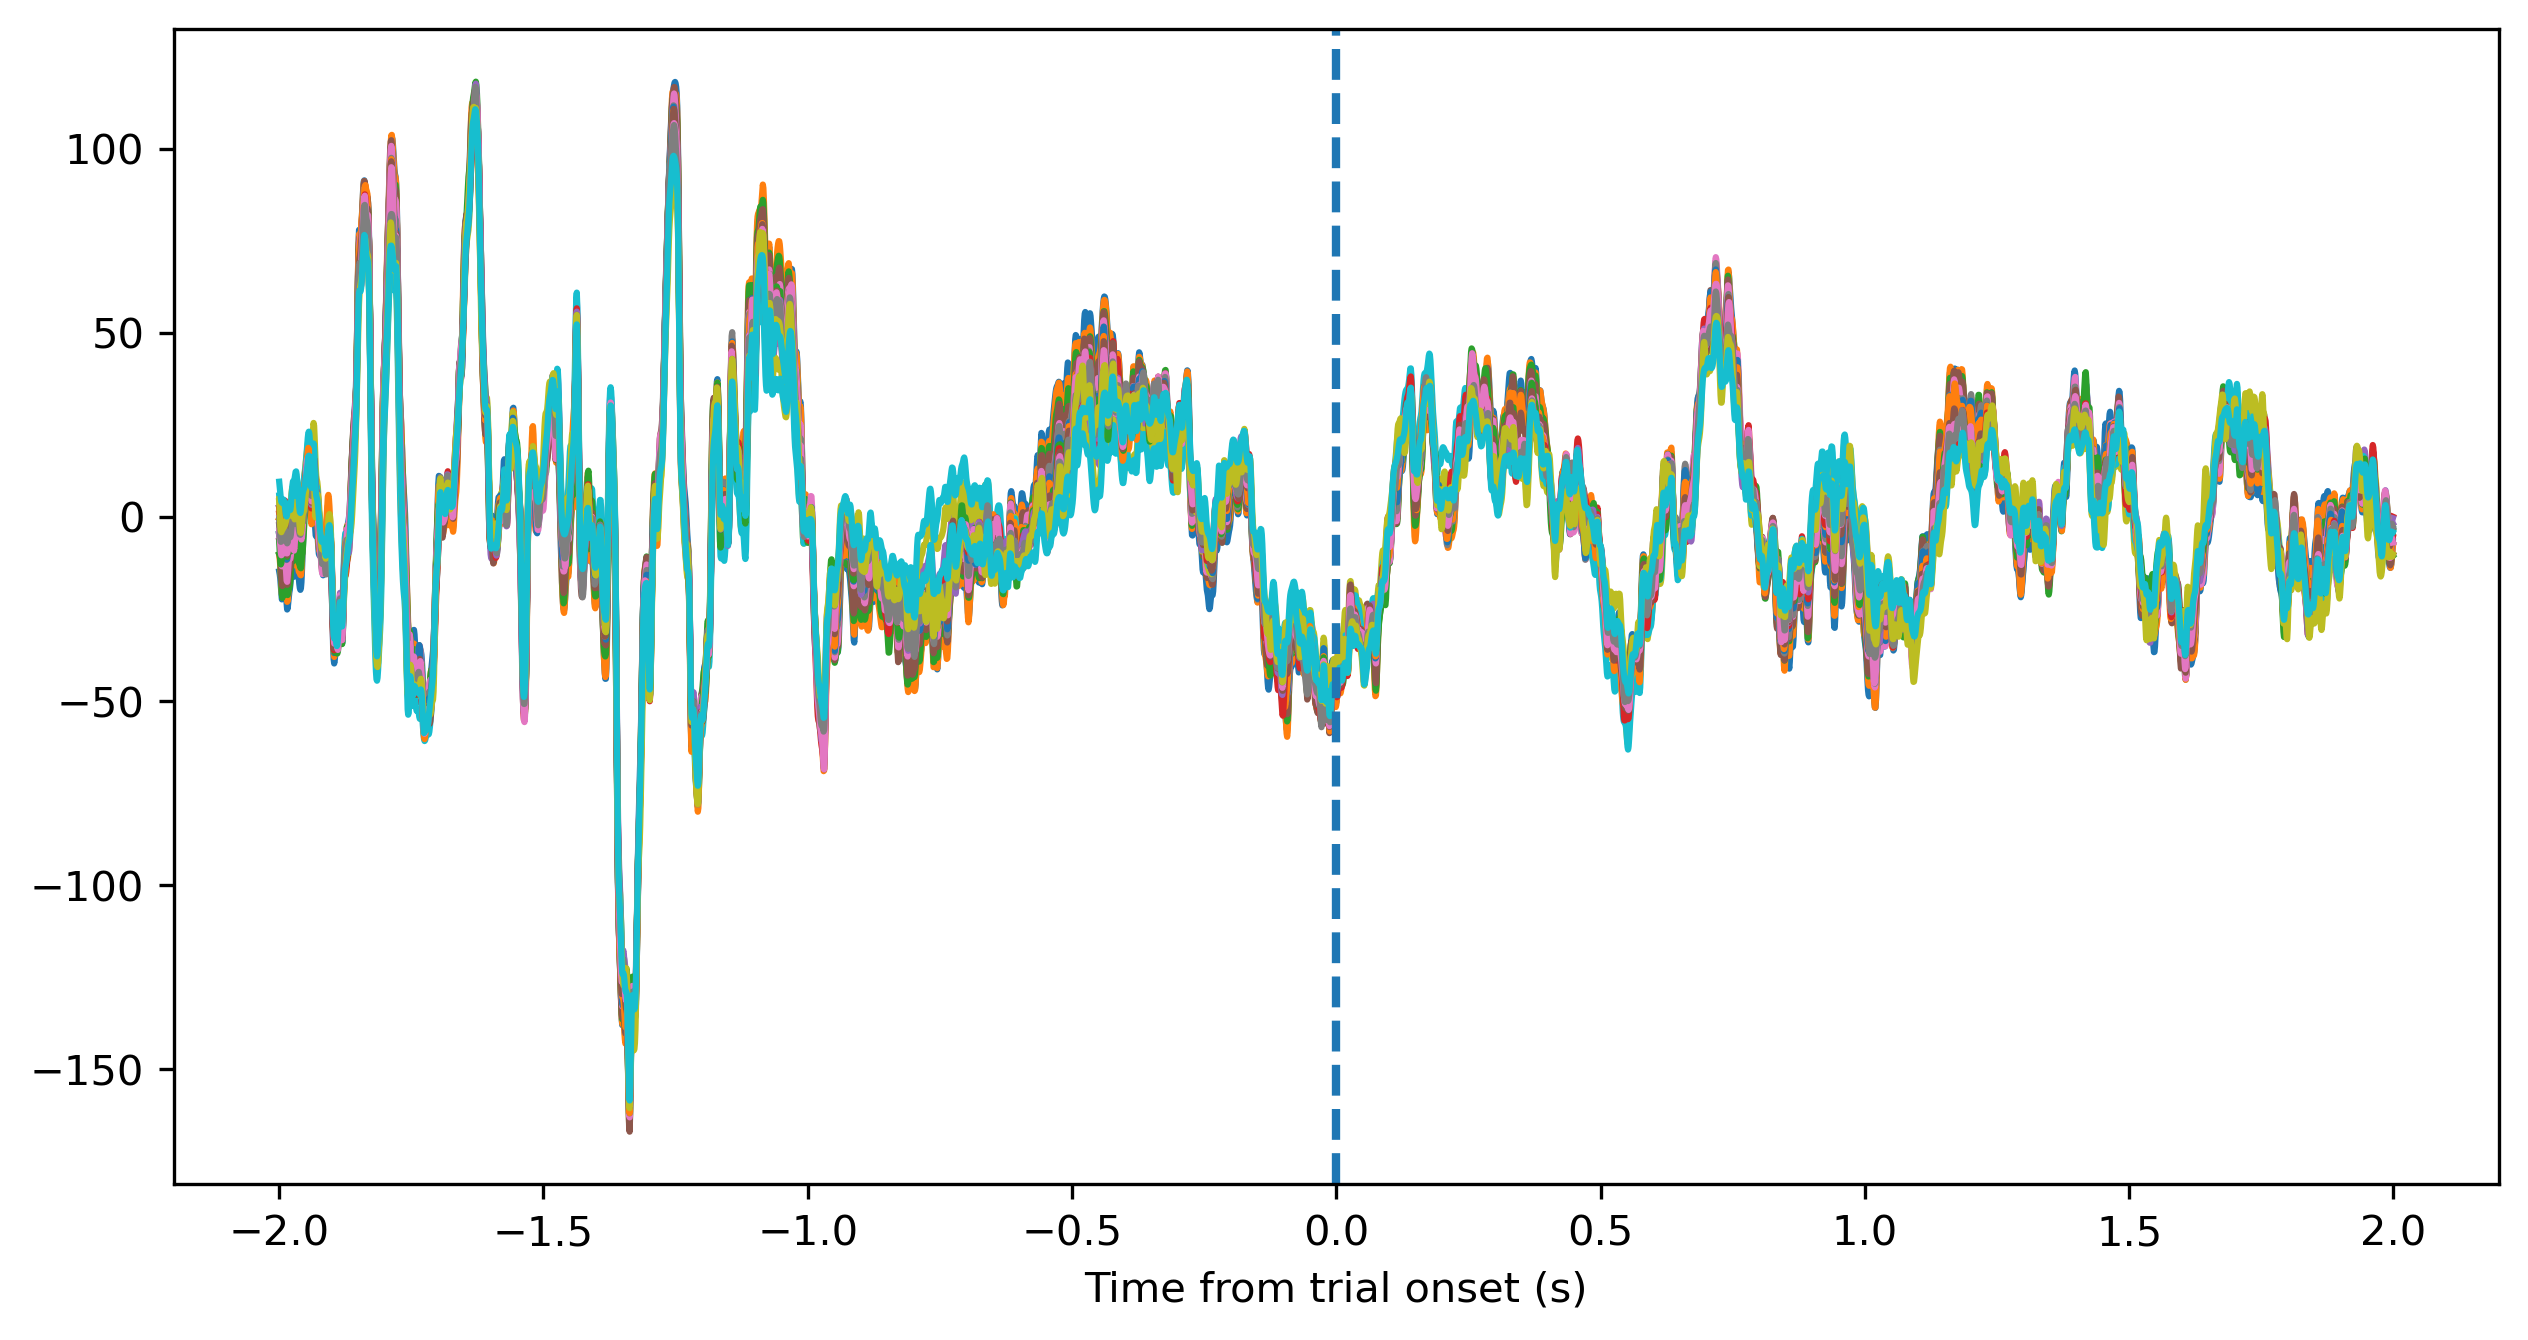

In [55]:
fig, ax = plt.subplots(figsize = (10,5), dpi=300)
times = np.arange(window[0], window[1], 1/lfp_fs)
for chan in range(traces.shape[2]):
    to_plot = np.mean(np.squeeze(traces[:,:,chan]), axis=0)
    # if not np.max(to_plot) > 50:
    ax.plot(
        times,
        to_plot,
        label=channel_ids[chan],
        )
    
ax.axvline(0, linestyle='--', linewidth=2)
# ax.legend()
ax.set_xlabel('Time from trial onset (s)')

In [53]:
traces.shape

(111, 4000, 20)

(3690.0, 3990.0)

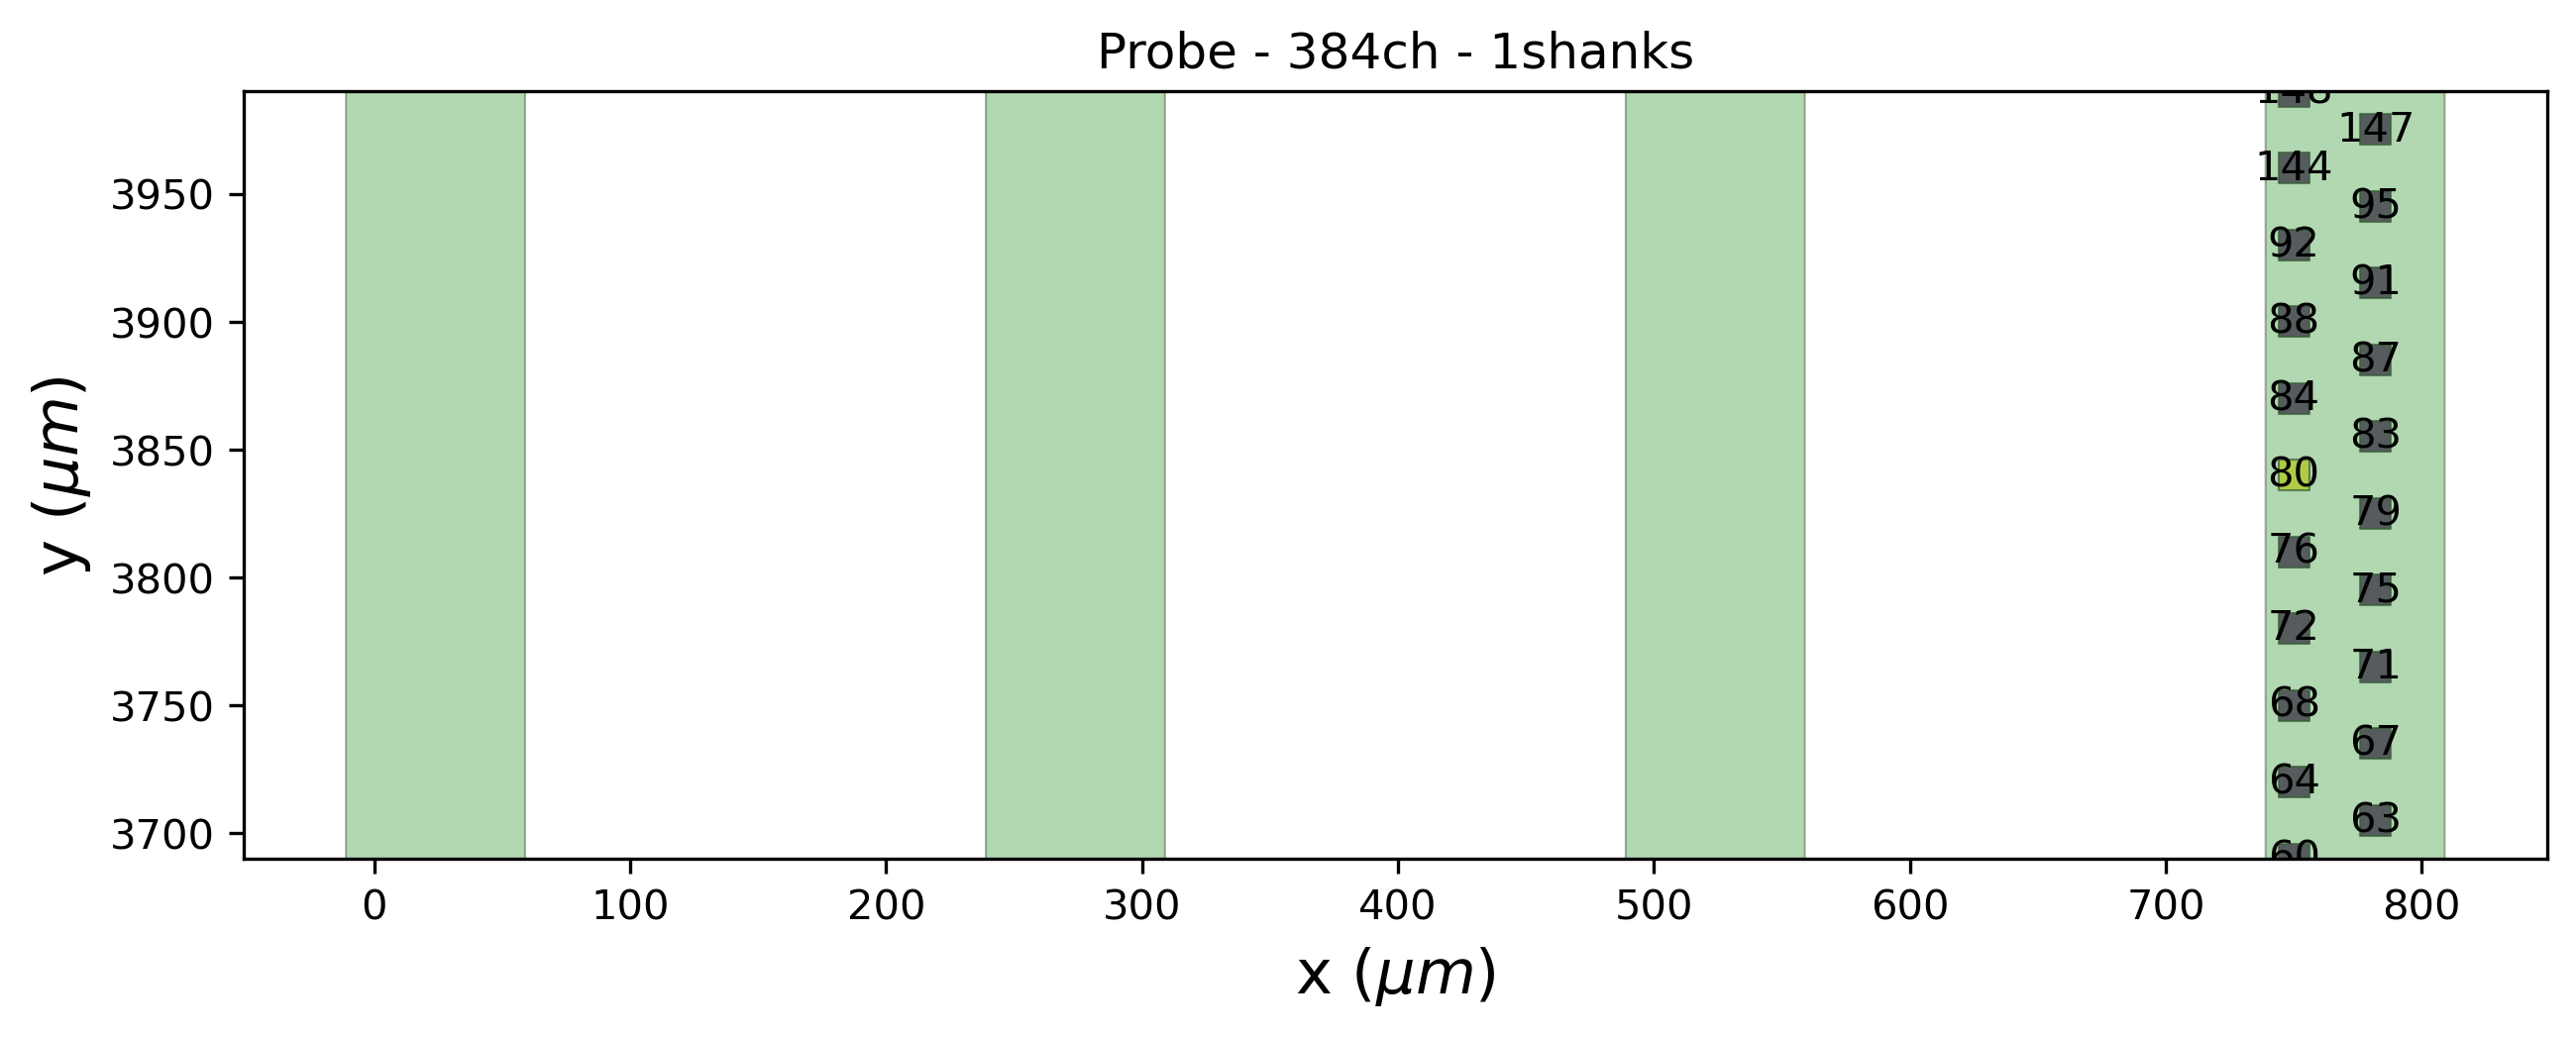

In [6]:
channel_indices = np.arange(0,384,20)
channel_ids = recording_lfp.channel_ids[channel_indices]

chan = channel_indices[4]

fig, ax = plt.subplots(1, 1, figsize=(10, 30), dpi=300)

probe = recording_lfp.get_probe()
values = np.zeros(len(probe.device_channel_indices))
values[int(chan)] = 1
plot_probe(probe, with_channel_index=True,
        contacts_values = values, ax=ax)

chan_id = recording_lfp.channel_ids[chan]
loc_y = recording_lfp.get_channel_locations([chan_id])[0][1]

ax.set_ylim(loc_y-150, loc_y+150)

In [4]:
channel_indices = np.arange(0,384,20)
channel_ids = recording_lfp.channel_ids[channel_indices]


In [5]:
channel_locs = recording_lfp.get_channel_locations(channel_ids)

In [13]:
loc[0][1]

3120.0

(147,)